<a href="https://colab.research.google.com/github/jackty9/Feature_Selection_Wrapper_Methods_in_Python/blob/master/Feature_Selection_Wrapper_Methods.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Forward Selection**

In [ ]:
#Load needed libraries
from sklearn.datasets import load_boston
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np

In [ ]:
# load_boston() sklearn dataset to boston
boston = load_boston()

# use np.c_ to concatenate into a dataframe
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df['PRICE'] = pd.Series(boston.target)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [ ]:
#Optional
#An overview of the boston dataset
print(boston.DESCR)

In [ ]:
#Split the features and target data
#select the first 13 columns as features
X = df.iloc[:,:13]
#Select the last column for target 
y = df.iloc[:,-1]

In [ ]:
#Define Sequential Forward Selection (sfs)
sfs = SFS(LinearRegression(),
           k_features=5,
           forward=True,
           floating=False,
           scoring = 'r2',
           cv = 0)
#Use SFS to select the top 5 features 
sfs.fit(X, y)

SequentialFeatureSelector(clone_estimator=True, cv=0,
                          estimator=LinearRegression(copy_X=True,
                                                     fit_intercept=True,
                                                     n_jobs=None,
                                                     normalize=False),
                          floating=False, forward=True, k_features=5, n_jobs=1,
                          pre_dispatch='2*n_jobs', scoring='r2', verbose=0)

In [ ]:
#Create a dataframe for the SFS results 
df_SFS_results = pd.DataFrame(sfs.subsets_).transpose()
df_SFS_results

,feature_idx,cv_scores,avg_score,feature_names
1,"(12,)",[0.5441462975864797],0.544146,"(LSTAT,)"
2,"(5, 12)",[0.6385616062603403],0.638562,"(RM, LSTAT)"
3,"(5, 10, 12)",[0.6786241601613112],0.678624,"(RM, PTRATIO, LSTAT)"
4,"(5, 7, 10, 12)",[0.6903077016842538],0.690308,"(RM, DIS, PTRATIO, LSTAT)"
5,"(4, 5, 7, 10, 12)",[0.7080892893529662],0.708089,"(NOX, RM, DIS, PTRATIO, LSTAT)"


# **(Recursive) Backward Elimination**

In [33]:
#Load needed libraries
from sklearn.datasets import load_boston
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np

In [34]:
# load_boston() sklearn dataset to boston
boston = load_boston()

# use np.c_ to concatenate into a dataframe
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df['PRICE'] = pd.Series(boston.target)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [ ]:
#Optional
#An overview of the boston dataset
print(boston.DESCR)

In [35]:
#Split the features and target data
#select the first 13 columns as features
X = boston.data
#Select the last column for target 
y = boston.target

In [36]:
#Build a linear regression model 
model = LinearRegression()
#Define RFE by using linear regression model and number of features to be selected
rfe = RFE(model, 5)
#Use RFE to select the top 5 features 
fit = rfe.fit(X, y)

In [ ]:
#Create a dataframe for the RFE results 
df_RFE_results = []
for i in range(X.shape[1]):
    df_RFE_results.append(
        {      
            'Feature_names': boston.feature_names[i],
            'Selected':  rfe.support_[i],
            'RFE_ranking':  rfe.ranking_[i],
        }
    )

df_RFE_results = pd.DataFrame(df_RFE_results)
df_RFE_results.index.name='Columns'
print("Selected 5 features using RFE")
df_RFE_results

Selecred 5 features using RFE


,Feature_names,Selected,RFE_ranking
Columns,,,
0,CRIM,False,4
1,ZN,False,6
2,INDUS,False,5
3,CHAS,True,1
4,NOX,True,1
5,RM,True,1
6,AGE,False,9
7,DIS,True,1
8,RAD,False,3


# **Step-wise Selection**

In [ ]:
#Load needed libraries
from sklearn.datasets import load_boston
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np

In [ ]:
# load_boston() sklearn dataset to boston
boston = load_boston()

# use np.c_ to concatenate into a dataframe
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df['PRICE'] = pd.Series(boston.target)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [ ]:
#Optional
#An overview of the boston dataset
print(boston.DESCR)

In [ ]:
#Split the features and target data
#select the first 13 columns as features
X = df.iloc[:,:13].values
#Select the last column for target 
y = df.iloc[:,-1].values


In [ ]:
#Define Sequential Floating Forward Selection (sffs)
sffs = SFS(LinearRegression(),
           k_features=5,
           forward=True,
           floating=True,
           scoring = 'r2',
           cv = 0)
#Use SFFS to select the top 5 features 
feature_names=boston.feature_names
sffs.fit(X, y, custom_feature_names=feature_names)

SequentialFeatureSelector(clone_estimator=True, cv=0,
                          estimator=LinearRegression(copy_X=True,
                                                     fit_intercept=True,
                                                     n_jobs=None,
                                                     normalize=False),
                          floating=True, forward=True, k_features=5, n_jobs=1,
                          pre_dispatch='2*n_jobs', scoring='r2', verbose=0)

In [ ]:
#Create a dataframe for the SFFS results 
df_SFFS_results = pd.DataFrame(sffs.subsets_).transpose()
df_SFFS_results #.info()


,feature_idx,cv_scores,avg_score,feature_names
1,"(12,)",[0.5441462975864797],0.544146,"(LSTAT,)"
2,"(5, 12)",[0.6385616062603403],0.638562,"(RM, LSTAT)"
3,"(5, 10, 12)",[0.6786241601613112],0.678624,"(RM, PTRATIO, LSTAT)"
4,"(5, 7, 10, 12)",[0.6903077016842538],0.690308,"(RM, DIS, PTRATIO, LSTAT)"
5,"(4, 5, 7, 10, 12)",[0.7080892893529662],0.708089,"(NOX, RM, DIS, PTRATIO, LSTAT)"


# **Bonus - What is the ideal number of features?**

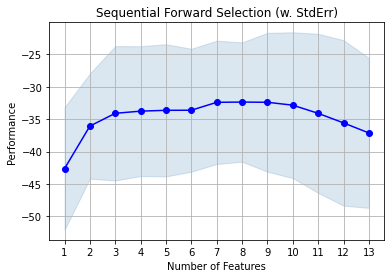

In [32]:
#Load needed libraries
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt

#import and prepare data
boston = load_boston()
X, y = boston.data, boston.target

#Define Sequential Forward Selection (sfs)
sfs = SFS(LinearRegression(), 
          k_features=13, 
          forward=True, 
          floating=False, 
          scoring='neg_mean_squared_error',
          cv=5)

#Apply SFS to the data
sfs = sfs.fit(X, y)

#plot the results
fig = plot_sfs(sfs.get_metric_dict(), kind='std_err')

plt.title('Sequential Forward Selection (w. StdErr)')
plt.grid()
plt.show()

#Option to export
#fig.savefig('filename.png', dpi=300)